In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from PIL import Image
import cv2 as cv

C:\Users\clyho\AppData\Local\Temp\ipykernel_31324\3351674013.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  fft[i] = np.fft.fft(sine_waves[i])


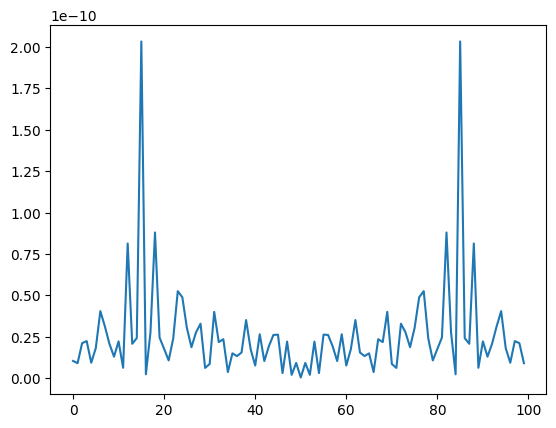

In [65]:
amplitude = 1 # Amplitude of the wave

frequency = np.random.randint(0, 100000, 1000) # Frequency of the wave in Hertz

phase = 0 # Phase shift of the wave in radians

sampling_rate = 100 # Number of samples per second

duration = 1 # Duration of the wave in seconds

# Create a numpy array of time values from 0 to duration

time = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)


sine_waves = np.zeros((1000, 100))
fft = np.zeros((1000, 100))
for i in range(1000):
    sine_waves[i] = amplitude * np.sin(2 * np.pi * frequency[i] * time + phase)
    fft[i] = np.fft.fft(sine_waves[i])

# Compute the modulus of the FFT (absolute values)
fft_modulus = np.abs(fft)

# # Plot the FFT modulus for one of the sine waves, e.g., the first sine wave
# fig = plt.figure(figsize=(10, 6))
# ax = fig.add_axes([0, 0, 1, 1])
# ax.set_axis_off()
# ax.imshow(fft_modulus[0], cmap='binary', aspect='auto')
# plt.show()


plt.plot(fft_modulus[2])  # Plot modulus of the FFT for the first sine wave
# plt.title('Modulus of FFT of First Sine Wave')
# plt.xlabel('Frequency Bin')
# plt.ylabel('Amplitude')
plt.savefig("fft_plot.png")
plt.show()


In [53]:
# Open the saved image and process it
img = Image.open("fft_plot.png")
img = img.convert("RGB")  # Ensure the image is in RGB mode

img_array = np.array(img)

# Extract RGB channels
# To crop the image, we slice the array on the rows and the colums
red_channel = img_array[80:520, 135:890, 0]
green_channel = img_array[80:520, 135:890, 1]
blue_channel = img_array[80:520, 135:890, 2]
    

# Apply threshold to create a binary image where blue is dominant over red and green
sensitivity = 70  # Threshold for blue dominance
blue_dominance = (blue_channel > red_channel + sensitivity) & (blue_channel > green_channel + sensitivity)

#Convert the boolean array to an image (black and white)
binary_image = Image.fromarray((blue_dominance * 255).astype(np.uint8))  # Multiply by 255 to get full range of black and white

# Save the binary image
binary_image.save("binary_fft_plot.png")

# Optionally, show the binary image using PIL
binary_image.show()

In [61]:
# Open the saved image and process it

img = Image.open("fft_plot.png")
img = img.convert("RGB")  # Ensure the image is in RGB mode

img_array = np.array(img)

# Extract RGB channels
# To crop the image, we slice the array on the rows and the colums
red_channel = img_array[80:520, 135:890, 0]
green_channel = img_array[80:520, 135:890, 1]
blue_channel = img_array[80:520, 135:890, 2]
    

# Apply threshold to create a binary image where blue is dominant over red and green
sensitivity = 70  # Threshold for blue dominance
blue_dominance = (blue_channel > red_channel + sensitivity) & (blue_channel > green_channel + sensitivity)

#Convert the boolean array to an image (black and white)
binary_image = Image.fromarray((blue_dominance * 255).astype(np.uint8))  # Multiply by 255 to get full range of black and white

# Save the binary image
binary_image.save("binary_fft_plot.png")

# Optionally, show the binary image using PIL
binary_image.show()

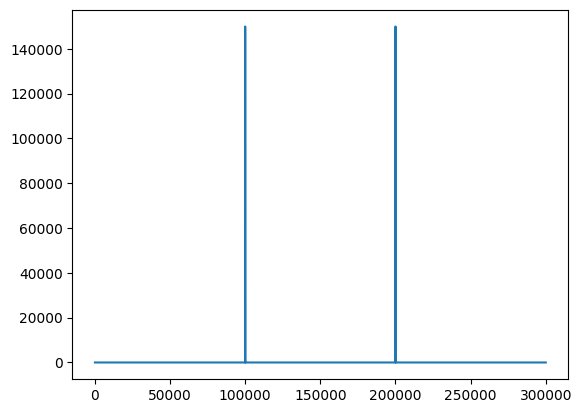

In [7]:
amplitude = 1
frequency= 100000
phase = 0
sampling_rate = frequency*3
time = np.linspace(0, 1, int(1 * sampling_rate), endpoint=False)
sine_wave = amplitude * np.sin(2 * np.pi * frequency * time)

# Compute the FFT of the sine wave
fft = np.fft.fft(sine_wave)
fft_modulus = np.abs(fft)

#plot the FFT modulus
plt.plot(fft_modulus)  # Plot modulus of the FFT